In [2]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    #n_clusters: Number of clusters to form.
    #max_iter: Maximum number of iterations to update centroids.
    #self.centroids: Will store the current positions of the centroids.

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

        #First, randomly select n_clusters data points from X as initial centroids.
        #Then, loop for a maximum of max_iter iterations:
        #Assign each data point to the nearest centroid.
        #Update centroids by calculating the mean of all points assigned to each cluster.
        #If centroids do not change (converged), stop early.
        #Finally, return the cluster assignments for all points.



    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

        #For each data point (row):
        #Calculate the Euclidean distance from the point to each centroid.
        #Uses np.sqrt(np.dot(row-centroid, row-centroid)) which is equivalent to Euclidean distance.
        #Find the centroid with the smallest distance.
        #Assign the point to that centroid's cluster.
        #Return a numpy array with the cluster indices for all points.

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

        #For each cluster (identified by unique values in cluster_group):
        #Calculate the mean (centroid) of all points assigned to that cluster.
        #Return the updated centroids as a numpy array.

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd



df = pd.read_csv('/kaggle/input/mall-customers-segmentation/Mall_Customers.csv')
df.head()
df.drop(["CustomerID","Genre","Age"],axis=1,inplace=True)

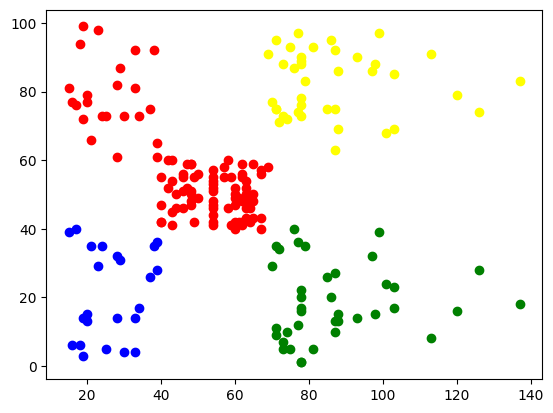

In [8]:
X = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()